### Hent data

In [1]:
import pandas as pd
import os

In [2]:
# Se alle "mock"-datasettene i datamappa
os.listdir('../data/mock_sysselsatte')

['population_2023_10000.csv',
 'population_2020_30000.csv',
 'companies_2019_30000.csv',
 'companies_2022_30000.csv',
 'population_2019_10000.csv',
 'companies_2023_30000.csv',
 'population_2022_10000.csv',
 'companies_2024_30000.csv',
 'population_2024_30000.csv',
 'companies_2021_30000.csv',
 'companies_2022_10000.csv',
 'companies_2019_10000.csv',
 'population_2023_30000.csv',
 'population_2021_30000.csv',
 'population_2019_30000.csv',
 'population_2022_30000.csv',
 'population_2021_10000.csv',
 'companies_2020_10000.csv',
 'population_2020_10000.csv',
 'companies_2021_10000.csv',
 'companies_2023_10000.csv',
 'companies_2020_30000.csv']

In [3]:
# Stapp datasettene som "objekter" inn i ett "variabelnavn"
comp = pd.read_csv('../data/mock_sysselsatte/companies_2019_30000.csv')
pop = pd.read_csv('../data/mock_sysselsatte/population_2019_30000.csv')

In [4]:
#Print preview av ett datasett
comp

,Unnamed: 0,work_id,nace,region_code,region,employee_points
0,0,118415099,11.070,3.0,Oslo,60
1,1,165189001,10.920,3.0,Oslo,54
2,2,205912967,10.130,2.0,Akershus (-2019),48
3,3,959013544,46.693,12.0,Hordaland (-2019),46
4,4,405013223,09.900,2.0,Akershus (-2019),88
...,...,...,...,...,...,...
1128,1128,706734220,51.210,50.0,Trøndelag - Trööndelage,15
1129,1129,156404021,74.200,18.0,Nordland,23
1130,1130,962214437,74.102,18.0,Nordland,12
1131,1131,999083400,43.341,10.0,Vest-Agder (-2019),21


<AxesSubplot:>

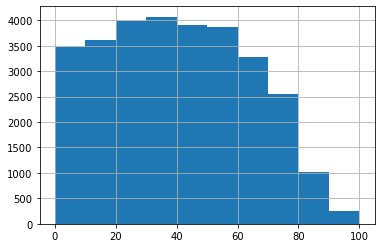

In [18]:
# Og det andre
pop['age'].hist()

### Fjern "Unnamed 0-kolonnen"

In [6]:
pop = pop.drop(columns=['Unnamed: 0'])

In [7]:
comp = comp.drop(columns=['Unnamed: 0'])

### Datatyper på kolonner fra CSV

In [8]:
print(pop.dtypes)
pop.head(3)

id                int64
work_id         float64
sex              object
age               int64
year_birth        int64
work_percent    float64
dtype: object


,id,work_id,sex,age,year_birth,work_percent
0,29101946112,NaN,Menn,0,2019,NaN
1,26101930288,NaN,Menn,0,2019,NaN
2,22091952214,NaN,Menn,0,2019,NaN


In [9]:
print(comp.dtypes)
comp.head(3)

work_id              int64
nace                object
region_code        float64
region              object
employee_points      int64
dtype: object


,work_id,nace,region_code,region,employee_points
0,118415099,11.070,3.0,Oslo,60
1,165189001,10.920,3.0,Oslo,54
2,205912967,10.130,2.0,Akershus (-2019),48


In [ ]:
# Regionkode burde kanskje ikke være en float? Men man kan ikke ha nan-verdier i en int...

<hr>

## Antall "OM MAN KOBLER"
<br>

In [16]:
len(pop[pop['work_id'].isin( # på radene hvor "work_id" i populasjonen finnes i...
            comp['work_id'] # "work_id"-kolonnen i selskaps-dataframen.
)])

15261

In [14]:
# Hvor mange av personene vil få påført arbeidsplass OM vi merger
# "Antall som vil koble"

len( # lengden (rader) av...
    pop[ # dataframen hvor populasjonen...
        pop['work_id'].isin( # på radene hvor "work_id" i populasjonen finnes i...
            comp['work_id'] # "work_id"-kolonnen i selskaps-dataframen.
        )
    ]
)

#På en linje:
len(pop[ pop['work_id'].isin(comp['work_id'])])

15261

In [ ]:
# Vi tar altså bare len() av en nedfiltrert dataframe
pop[pop['work_id'].isin(comp['work_id'])]

<AxesSubplot:>

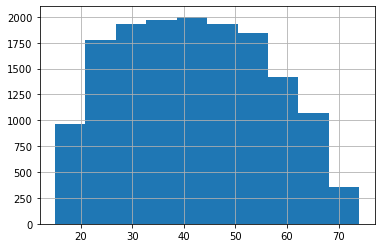

In [17]:
# Denne nedfiltrerte versjonen kan fint assignes til ett nytt variabelnavn å jobbes videre, om man vil...
pop_arbeidere = pop[pop['work_id'].isin(comp['work_id'])]
# F.eks. plott ett histogram av aldersfordelingen i antall som jobber
pop_arbeidere['age'].hist()

<hr>

## Faktisk "kobling" - merge / join
<br>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [24]:
#comp.columns = ['work_id', 'sex', 'region_code', 'region', 'employee_points']

In [26]:
# Fest selskaper på personer
pop_comp = pop.merge(comp, 
                     left_on = 'work_id', 
                     right_left = 'work_id', 
                     how = 'left') 

In [28]:
len(pop_comp)

30000

In [27]:
pop_comp.iloc[10000:10010]

,id,work_id,sex_x,age,year_birth,work_percent,sex_y,region_code,region,employee_points
10000,30096929030,114875448.0,Menn,50,1969,100.0,10.920,3.0,Oslo,53.0
10001,26036377544,307752350.0,Menn,56,1963,100.0,11.060,3.0,Oslo,90.0
10002,27056393268,387278555.0,Menn,56,1963,100.0,24.410,6.0,Buskerud (-2019),6.0
10003,25095943666,NaN,Menn,60,1959,NaN,NaN,NaN,NaN,NaN
10004,29105529970,NaN,Menn,64,1955,NaN,NaN,NaN,NaN,NaN
10005,4106142208,NaN,Menn,58,1961,NaN,NaN,NaN,NaN,NaN
10006,14116883264,963058147.0,Menn,51,1968,100.0,50.202,50.0,Trøndelag - Trööndelage,10.0
10007,9035845356,960385978.0,Menn,61,1958,100.0,46.433,12.0,Hordaland (-2019),24.0
10008,25076606874,205912967.0,Menn,53,1966,100.0,10.130,2.0,Akershus (-2019),48.0
10009,8115798764,NaN,Menn,62,1957,NaN,NaN,NaN,NaN,NaN


In [21]:
if len(pop) != len(pop_comp):
    raise ValueError(f"pop: {len(pop)} - pop_comp: {len(pop_comp)} Det har skjedd noe med lengden på antall personer... ")

### Join er ett alternativ til merge, men bør egentlig ikke brukes?
Man beholder i utgangspunktet kopier av den raden man joiner på.\
Det viktige med en "join" er at den merger på "indexen" til radene, og man er dermed avhengig av å sette denne til nøkkelen...\
Det kan være mer nyttig å bare holde seg til merge().

In [ ]:
# Legg spesielt merke til .set_index()
pop_comp2 = pop.join(comp.set_index('work_id'), on ='work_id')
pop_comp2.iloc[10000:10010]